# Moonquake Analysis

<img src="https://raw.githubusercontent.com/civilinifr/fc_python_class/master/easy_challenges/images/calvin_seismic_waveform.jpeg" alt="Drawing" style="width: 350px;">
* Image created using Microsoft Designer

## Problem Description

Calvin is planning a new seismic investigation on the surface of the moon to look for ice, and wants to design a new processing workflow to best capture information of seismic waveforms. To test it, he goes back to data from the Apollo missions. 

Here is a link to a seismic event from Apollo 12 that you can download on your computer:
https://drive.google.com/file/d/1IvIGglmYAtq9bfiMzmP8i9UUGcyYsPzg/view?usp=sharing

The objectives are to extract the following information from the seismic waveform:
- The maximum amplitude of the waveform (units are filtered machine counts per second)
- The length in seconds of the waveform
- The characteristic frequencies of the seismic wave
- Display the data in both a time series (i.e. the seismic wiggles) and a spectrogram. 



## Getting started

The data is in a seismic format called "miniseed", with the file extension ".mseed". This is a binary type format that you will not be able to read with a standard text editor. Fortunately, there are handy Python routines that we can use to read the data. The most popular one is called Obspy, which can be installed using a simple "pip" command. 

Once installed, you can read a file using the following method:

In [13]:
from obspy.core import read

ObsPy reads input data into a **stream**, a structure that typically has multiple seismograms (each is called a **trace**). In this example, each stream will only have one trace, but we still have to select it (index value of zero).

In [14]:
# Setup the file path
infile = './xa.s12.00.mhz.1969-12-16_HR00_evid00006.mseed'

# Read in the stream
st = read(infile)

# We can see how many traces there are in a stream
print(st)

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1969-12-16T00:00:00.178000Z - 1969-12-16T01:00:00.027057Z | 6.6 Hz, 23850 samples


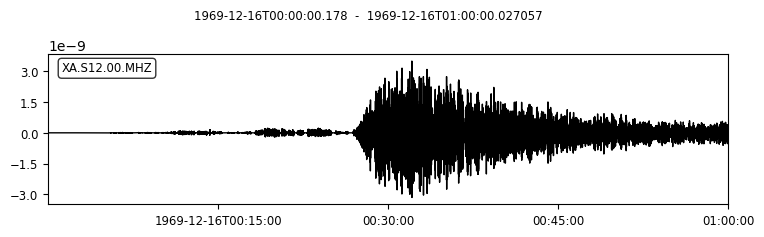

In [15]:
# Plot the trace
tr = st[0]
single_trace = tr.plot()

We can get some helpful information about each trace by called .stats

In [16]:
tr.stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1969-12-16T00:00:00.178000Z
         endtime: 1969-12-16T01:00:00.027057Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 23850
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 48, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 196608})

Instead of using the default plotting, I highly recommend using something like MatPlotLib instead to plot the data results. To do so, you'll need to extract both the time vector and data vector from the data. You can use the .times and .data methods on the trace to do so. 

In [17]:
time_vector = tr.times()
data_vector = tr.data

Text(0.5, 1.0, 'My First Moonquake')

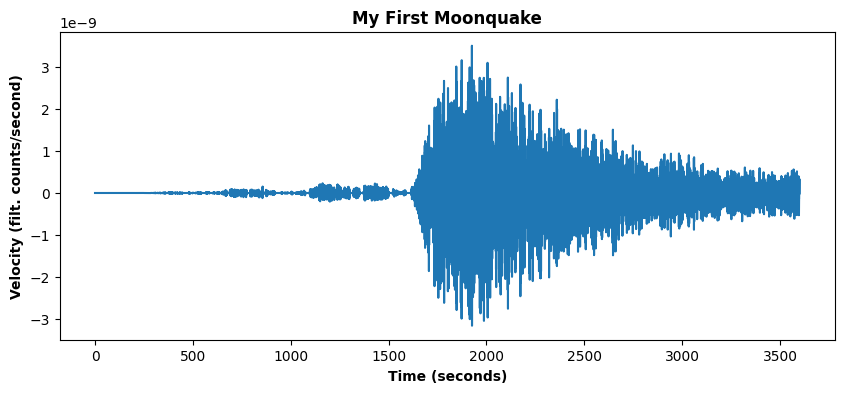

In [18]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 4))
ax0 = plt.subplot(1, 1, 1)
ax0.plot(time_vector, data_vector)
ax0.set_xlabel('Time (seconds)', fontweight='bold')
ax0.set_ylabel('Velocity (filt. counts/second)', fontweight='bold')
ax0.set_title('My First Moonquake', fontweight='bold')